# Orbital Watchdog Data Downloader


This notebook demonstrates how data for our Orbital Watchdog hackathon project are downloaded.

## Dependencies
All the dependencies are listed in `requirements.txt`.
Run the following command to install them using pip:

In [ ]:
% pip install -r requirements.txt


Required imports:

In [2]:
import openeo
import xarray
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
from openeo.processes import eq


## Initialize
**If you only want to try to display data, you can skip to visualisation and you don't need a copernicus account!**

You need to have account on dataspace.copernicus.eu
It's free and there are 4000 free credits. 
Dataset of 3 years for small area of Sentinel-1 took 15 credits, so 4000 is enough for experiments.

After running the following block, you may need to click the link in the output and login using web browser.

Btw: I had weird problem with authentication, following snippet solved it. Ignore it if you don't have any problems.

In [18]:
from openeo.rest.auth.config import RefreshTokenStore
RefreshTokenStore().remove()

In [3]:
conn = openeo.connect("openeo.dataspace.copernicus.eu")
store = conn.authenticate_oidc()

Authenticated using refresh token.


## Check info about available collections
You can use following methods to view some docs.

In [ ]:
conn.list_collections()

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.c

In [4]:
conn.describe_collection("SENTINEL1_GRD")

{'assets': {'thumbnail': {'href': 'https://collections.eurodatacube.com/sentinel-1-grd/sentinel-1-grd.png',
   'roles': ['thumbnail'],
   'title': 'Thumbnail',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands', 'values': ['VH', 'VV']},
  't': {'extent': ['2014-10-03T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-85, 85],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'The Sentinel-1 mission provides data from a dual-polarization C-band Synthetic Aperture Radar (SAR) instrument. This collection includes the S1 Ground Range Detected (GRD) scenes, processed to a calibrated, ortho-corrected product. This collection is compatible with "sar_backscatter" and "ard_normalized_radar_backscatter" processes.',
 'extent': {'spatial': {'bbox': [[-180, -85, 180, 85]]},
  'temporal': {'interval': [['2014-10-03T00:00:00Z', None]]}},
 'id': 'SENTINEL1_GRD',
 'keywords': ['raster',
  'systematic',
  'satellite imagery',
  'SAR',
  'radar',
  'backscattering',
  'polarization',
  'Copernicus',
  'maritime monitoring',
  'land monitoring',
  'disaster response',
  'open data'],
 'license': 'free',
 'links': [{'href': 'https://sentinel.esa.int/web/sentinel/technical-guides/sentinel-1-sar/products-algorithms/level-1-algorithms/ground-range-detected',
   'rel': 'about',
   'title': 'User guide'},
  {'href': 'https://catalogue.dataspace.copernicus.eu/resto/api/collections/Sentinel1/search.json?&filter=producttype:GRD',
   'rel': 'opensearch',
   'title': 'OpenSearch product query link'},
  {'href': 'https://services.sentinel-hub.com/ogc/wmts/113184fa-263a-4bd8-a2d3-0c00fbcef8b5',
   'rel': 'wmts',
   'wmts:dimensions': {'warnings': True},
   'wmts:layer': 'SAR-URBAN'},
  {'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'root'},
  {'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'parent'},
  {'href': 'https://openeo.dataspace.copern

## Specify which data to fetch (create a pipeline)
Note that you are just building the pipeline, it will be run in the end

In [5]:
# Area where to get the data
# Mariupol
# bbox = {
#     "west":37.464397295697694,
#     "south": 47.05992135191326,
#     "east":  37.65127304351881,
#     "north": 47.142010185603084,
#     "crs": "EPSG:4326" # Coordinate system standard
# }

# Antakya
bbox = {
    "west":36.148692878491327,
    "south": 36.202254495488305, #
    "east":  36.15976831740696,
    "north": 36.20851804388457, #
    "crs": "EPSG:4326" # Coordinate system standard
}

# Radar data
collection = conn.load_collection(
    "SENTINEL1_GRD",
    # "SENTINEL1_GLOBAL_MOSAICS",
    spatial_extent=bbox,
    temporal_extent=["2022-12-01", "2023-03-30"],
    bands=["VH", "VV"],
    properties={"orbitDirection": lambda od: eq(od, "ASCENDING")}
)

# # This is mandatory for Sentinel 1
collection = collection.sar_backscatter(
    coefficient="sigma0-ellipsoid",
    elevation_model="COPERNICUS_30")

collection = collection.apply(lambda x: 10 * x.log(base=10))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openeo\rest\connection.py:1266: UserWarning: SENTINEL1_GRD property filtering with properties that are undefined in the collection metadata (summaries): orbitDirection.
  return DataCube.load_collection(


## Specify the format
By default, `save_result` saves the collection of images into GeoTIFF files. 
- Beware, not nicely downloadable from the openeo portal after job finishes. Only as individual files.
- But they are more easily convertible into GeoJSON
- And job results can be obtained programatically, so it's not a big problem

In [48]:
collection_after_save = collection.save_result()

We can also download it in NetCDF format (`.nc` file extension), in single file.
- Beware of file size and RAM.
- Convertibility into GeoJSON? Manual, or some script on github... not even pip...

**Don't run this if you already created a job for GeoTIFF**

In [6]:
collection_after_save = collection.save_result(format="NetCDF")

## Create and run the job
This is beneficial because I was able to run it on the server and turn off my PC and go to sleep.

It didn't took long, but it may be useful.

In [ ]:
job = collection_after_save.create_job(title="Mariupol GTiff test")

In [8]:
job = collection_after_save.create_job(title="Antakya SAR")

In [9]:
job.start()

<BatchJob job_id='j-241123947461491d94beeec5768dab84'>

In [12]:
job.status()

'queued'

## Visualize the results
Download the file from the portal.
It can be alternatively fetched in code but I didn't want to do that.
Run the according block based on your format.

Code for 1 GeoTiff picture:

In [ ]:

da = rioxarray.open_rasterio("mariupol.tif")
ds = da.to_dataset(dim="band")

# Rename the variable to a more useful name
ds = ds.rename({1: "VV", 2: "VH"})

# Convert xarray DataSet to a (bands, x, y) DataArray
data = ds[["VV", "VH"]].to_array(dim="bands")

Code for NetCDF image collection:

In [3]:
ds = xarray.load_dataset("downloads/antakya.nc")

# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["VV", "VH"]].to_array(dim="bands")

In [4]:
data

<xarray.DataArray (bands: 2, t: 8, y: 73, x: 103)> Size: 481kB
array([[[[ -5.918093  ,  -5.77462   ,  -7.0342045 , ...,  -4.461971  ,
           -4.3292465 ,  -4.3890433 ],
         [ -6.079926  ,  -4.9366684 ,  -5.5147142 , ...,  -2.1322038 ,
           -2.4406965 ,  -4.1683736 ],
         [ -6.9503365 ,  -4.809742  ,  -4.601416  , ...,   0.269916  ,
            0.2052224 ,  -3.1659472 ],
         ...,
         [ -7.737362  ,  -7.271346  ,  -6.022317  , ...,  -8.893839  ,
           -8.166928  ,  -8.172625  ],
         [ -8.867973  ,  -6.8844843 ,  -6.5206194 , ..., -10.523436  ,
          -10.313623  , -11.314263  ],
         [ -8.900856  ,  -6.739158  ,  -9.289848  , ...,  -5.3531637 ,
           -9.923459  , -10.360736  ]],

        [[ -6.7178097 ,  -8.693817  ,  -6.7002335 , ...,  -9.177494  ,
           -7.622034  ,  -6.6270714 ],
         [ -6.4292026 ,  -6.8298283 ,  -4.759805  , ...,  -6.725259  ,
           -4.789933  ,  -4.7426453 ],
         [ -7.001178  ,  -5.356058  ,  -3.461409  , ...,  -2.995299  ,
           -0.86975694,  -3.0429385 ],
...
         [-16.629976  , -14.821176  , -10.702348  , ...,  -9.930288  ,
          -14.340386  , -16.220896  ],
         [-16.622955  , -15.727484  , -11.687948  , ..., -10.523019  ,
          -15.013569  , -17.50285   ],
         [-13.50421   , -13.563513  , -13.428629  , ..., -14.283571  ,
          -18.144726  , -18.963093  ]],

        [[ -8.286162  ,  -9.278666  , -11.286688  , ..., -13.074387  ,
          -12.377524  , -11.83147   ],
         [ -7.3843646 ,  -7.2249722 ,  -8.39525   , ...,  -9.721228  ,
           -9.523183  , -10.281514  ],
         [ -9.869961  ,  -9.002834  ,  -9.404505  , ...,  -5.6641846 ,
           -6.1679144 ,  -8.606531  ],
         ...,
         [-11.229325  , -11.799227  , -11.542963  , ..., -17.379173  ,
          -17.64215   , -15.6520195 ],
         [-14.954358  , -13.730516  , -12.10278   , ..., -13.759924  ,
          -15.203052  , -15.037894  ],
         [-12.6470375 , -11.412546  , -12.764441  , ..., -11.84154   ,
          -14.012227  , -15.151395  ]]]], dtype=float32)
Coordinates:
  * t        (t) datetime64[ns] 64B 2022-12-11 2022-12-23 ... 2023-03-05
  * x        (x) float64 824B 2.436e+05 2.437e+05 ... 2.447e+05 2.447e+05
  * y        (y) float64 584B 4.011e+06 4.011e+06 ... 4.01e+06 4.01e+06
  * bands    (bands) object 16B 'VV' 'VH'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.50.1a1
    description:  
    title:

Plot single image in GeoTIFF:

In [ ]:

fig, ax = plt.subplots(figsize = (22,18))
ax.set_axis_off()
# plot the data - single image
data[{"bands": 1}].plot.imshow(ax=ax, add_labels=False)

plt.show()

Plot first number from image collection:

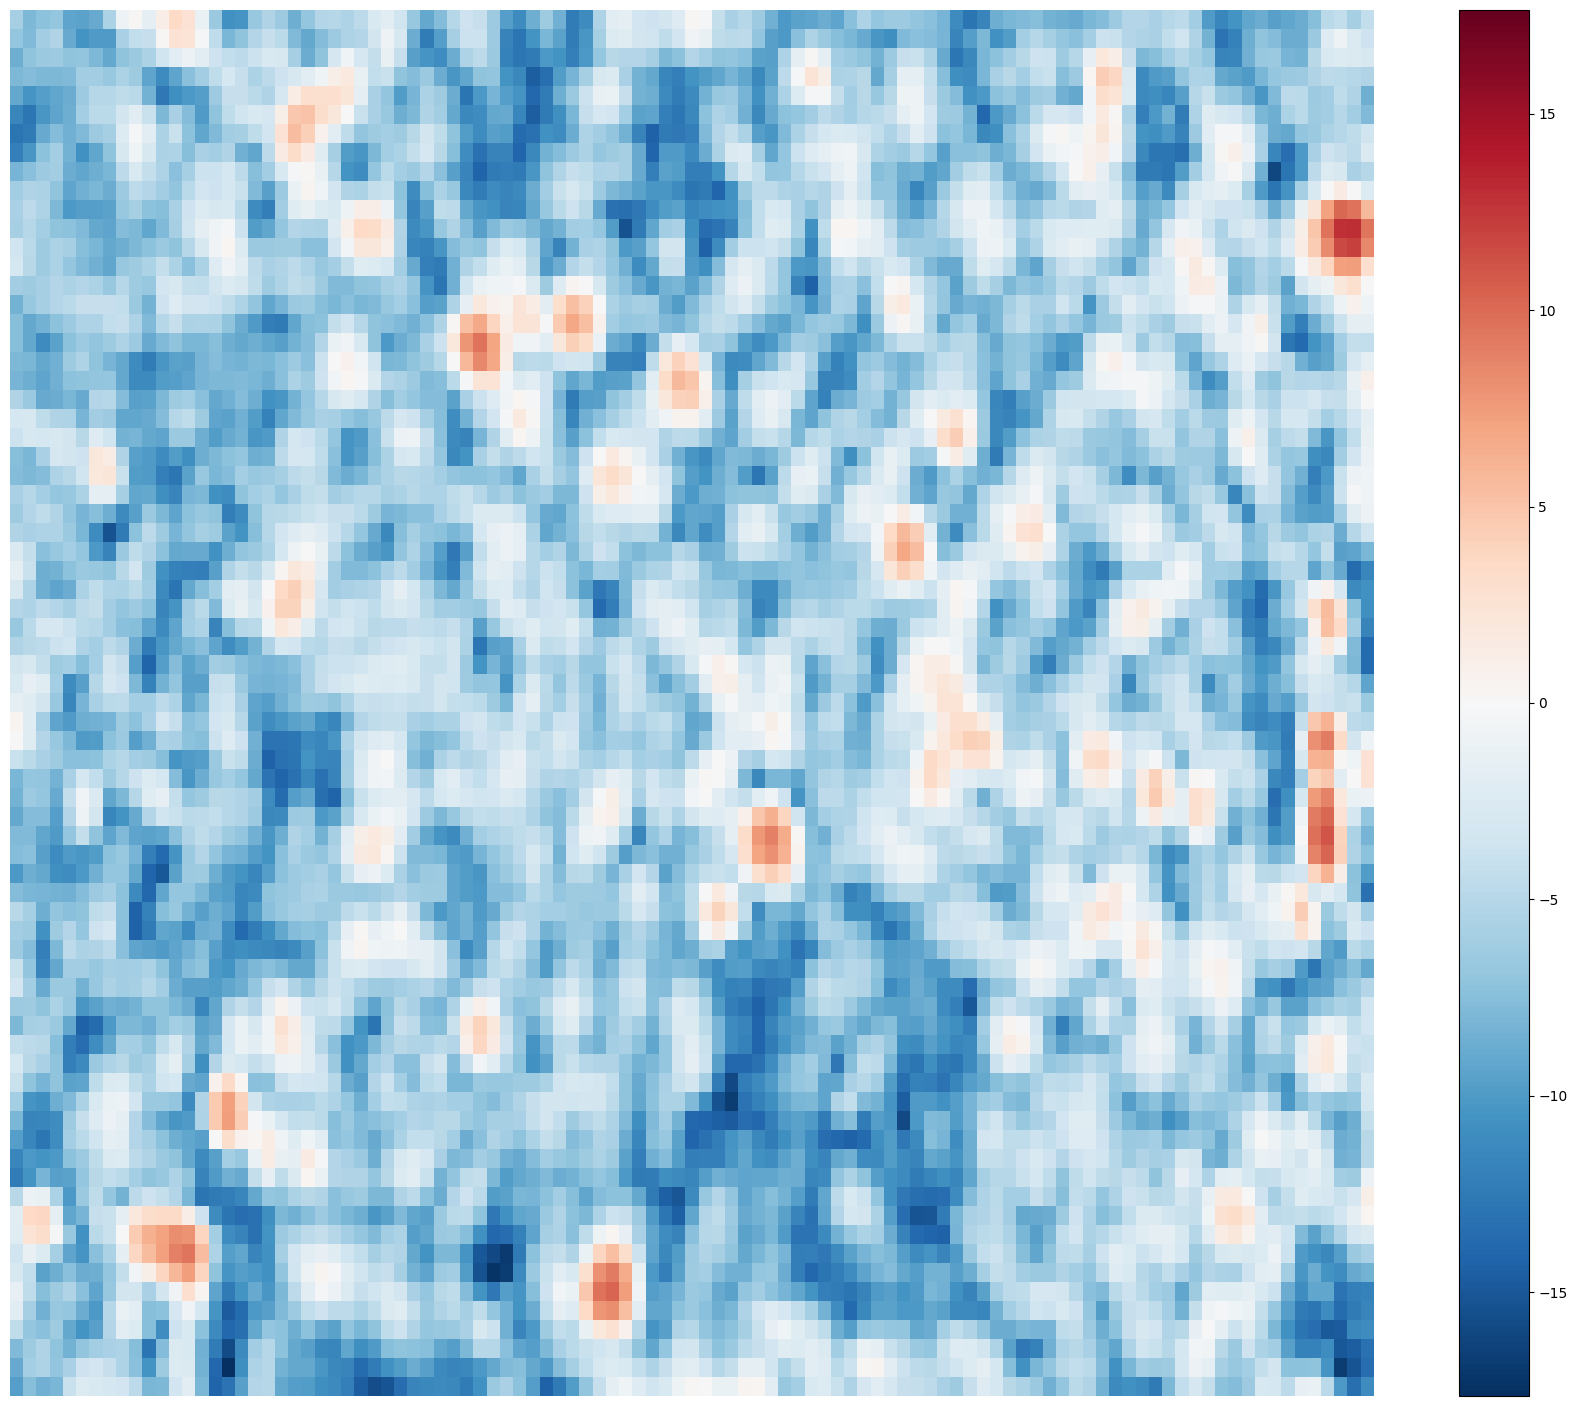

In [6]:
fig, ax = plt.subplots(figsize = (22,18))
ax.set_axis_off()
# plot the data - select first from image collection
data[{"t": 4, "bands": 0}].plot.imshow(ax=ax, add_labels=False)
plt.show()

In [19]:
input_data = np.array(data[{"t": 0, "bands": 0}])

In [20]:
np.max(input_data)

146.03764

In [21]:
np.min(input_data)

0.0040471856

In [24]:
input_data[input_data>20].shape

(77,)

In [25]:
input_data[input_data>10].shape

(241,)

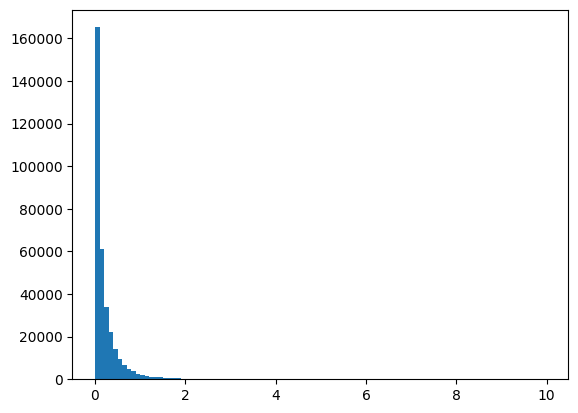

In [26]:
plt.figure()
plt.hist(input_data[input_data<=10].flatten(), bins=100)
plt.show()